# Funds exploratory

We are going to perform an EDA on several mutual funds.

## Import libraries

In [6]:
library(reticulate)
library(jsonlite)
source('../src/R/rfunds.R')

## Load data

All the funds start with an initial investment of 100:

In [16]:
tbl_funds<-read_csv('fondos_indexados_selfbysingular.csv')


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  Fondo = col_character(),
  ISIN = col_character(),
  Divisa = col_character(),
  RCiNesMgVo = col_double(),
  Categoria = col_character(),
  Gestora = col_character(),
  Area = col_character(),
  Comision = col_double(),
  `Tipo de fondo` = col_character()
)




In [9]:
pyfunds <- import_from_path('pyfunds', path = "../src/")
dt <- import("datetime", convert = FALSE)
funds<-tbl_funds$ISIN
m<-pyfunds$MorningStar(ISINs=funds, currency='EUR', start_date=dt$date(2009L, 1L, 1L))


In [11]:
df_values<-m$df_values
df_values$date<-as.POSIXct(rownames(df_values))

## Data Analysis

First we calculate the ROI over a sliding window of one year for all the funds

In [12]:
df_roi_var<-m$calc_roi_var(num_days=365)
df_roi<-df_roi_var[[1]]

In [32]:
df_roi$date<-as.POSIXct(rownames(df_roi))

We can calculate a summary of the bonds:
* **mean:** Aritmetic mean of all the ROI values calculated over a sliding window
* **geom:** Geometric mean of all the ROI values calculated over a sliding window
* **var:** Variance of all the ROI values calculated over a sliding window
* **mindate:** Starting date of the fund history
* **days_losses:** Maximum number of consecutive losses the fund has experienced

In [13]:
df_summary<-calc_summary(df_values, num_days=365)
head(df_summary)

Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”


,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
IE0002639551,1.084667,1.077003,0.01671718,2009-01-01,223
IE0002639775,1.158210,1.152588,0.01335371,2009-01-01,120
IE0004234476,1.146224,1.140619,0.01315928,2009-01-01,121
IE0004234583,1.146240,1.140658,0.01310663,2009-01-01,121
IE0007201266,1.049140,1.041206,0.01644175,2014-02-27,325
IE0007218849,1.101425,1.088924,0.03043454,2009-01-01,325


LU0996182563 Amundi Is Msci World Ae-C

LU1882445999 Amundi Fds China Equity C Eur C

LU0996179007 Amundi Is Sp 500 Ae-A

In [19]:
head(tbl_funds)

Fondo,ISIN,Divisa,RCiNesMgVo,Categoria,Gestora,Area,Comision,Tipo de fondo
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Amundi Index MSCI Europe Clmt Chg AE-C,LU1437020222,EUR,5,RV Europa Cap. Grande Blend,Amundi Luxembourg,Europa,0.52,Renta Variable
Amundi Index MSCI Glb Climt Chg AE,LU1437021204,EUR,5,RV Global Cap. Grande Blend,Amundi Luxembourg,Globales,0.47,Renta Variable
Amundi IS Amundi MSCI Europe SRI AE C,LU1861136833,EUR,6,RV Europa Cap. Grande Blend,Amundi Luxembourg,Europa,0.20,Renta Variable
Amundi IS Bcly Euro CorpBBB 1-5 AE-C,LU1525412281,EUR,3,RF Deuda Corporativa EUR,Amundi Luxembourg,Europa,0.25,Renta Fija
Amundi IS EqGlb MltSmrtAllScBt AE-C EUR,LU1437019307,EUR,6,RV Global Cap. Flexible,Amundi Luxembourg,Globales,0.36,Renta Variable
Amundi IS Euro AGG Corporate SRI AE-C,LU1050469367,EUR,3,RF Deuda Corporativa EUR,Amundi Luxembourg,Globales,0.20,Renta Fija


In [23]:
portfolio<-tbl_funds[tbl_funds$Comision<0.5,c("ISIN","Fondo")]
names(portfolio)<-c("codigoIsin","nombre")
portfolio

codigoIsin,nombre
<chr>,<chr>
LU1437021204,Amundi Index MSCI Glb Climt Chg AE
LU1861136833,Amundi IS Amundi MSCI Europe SRI AE C
LU1525412281,Amundi IS Bcly Euro CorpBBB 1-5 AE-C
LU1437019307,Amundi IS EqGlb MltSmrtAllScBt AE-C EUR
LU1050469367,Amundi IS Euro AGG Corporate SRI AE-C
LU1050469441,Amundi IS Euro AGG Corporate SRI AE-D
LU1328852659,Amundi IS FTSE EPRA NAREIT Global AE-C
LU1328852493,Amundi IS FTSE EPRA NAREIT Global AE-D
LU1328852220,Amundi IS FTSE EPRA NAREIT Global AU-C


In [24]:
df_summary<-calc_summary(df_values[,c("date",portfolio$codigoIsin)], num_days=365)
head(df_summary)

Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”
Warning message in max(lengths[values], na.rm = T):
“no non-missing arguments to max; returning -Inf”


,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
IE0002639551,1.084667,1.077003,0.01671718,2009-01-01,223
IE0002639775,1.158210,1.152588,0.01335371,2009-01-01,120
IE0007201266,1.049140,1.041206,0.01644175,2014-02-27,325
IE0007218849,1.101425,1.088924,0.03043454,2009-01-01,325
IE0007286036,1.086027,1.078920,0.01601546,2009-01-01,193
IE0007292422,1.086054,1.078944,0.01602206,2009-01-01,193


In [25]:
historic_portfolio<- rownames(df_summary)[df_summary$mindate<'2017-01-01' & df_summary$geom>1.04]
historic_portfolio

[1] "IE0002639551" "IE0002639775" "IE0007201266" "IE0007218849" "IE0007286036"
 [6] "IE0007292422" "IE0007471927" "IE0007472990" "IE0007987708" "IE0008248803"
[11] "IE0031786696" "IE0031787223" "IE0032126645" "IE0033862917" "IE00B02JYG83"
[16] "IE00B03HD191" "IE00B03HD209" "IE00B03HD316" "IE00B04GQT48" "IE00B04GQX83"
[21] "IE00B18GCB14" "IE00B1G3DH73" "IE00B1S74Q32" "IE00B1S74W91" "IE00B1S75374"
[26] "IE00B1S75820" "IE00B246KL88" "IE00B2RHVR18" "IE00B3X1LS57" "IE00B3X1NT05"
[31] "IE00B42LF923" "IE00B42W4L06" "IE00B505V954" "IE00B50MZ724" "IE00B50MZ948"
[36] "IE00B51KVT96" "IE00B51KW525" "IE00B523L081" "IE00B523L313" "IE00B526YN16"
[41] "IE00B5456744" "IE00B76VTL96" "IE00B76VTM04" "IE00B76VTN11" "IE00B76VTR58"
[46] "IE00BH65QN23" "LU0069450319" "LU0130731390" "LU0130732877" "LU0148536690"
[51] "LU0148538712" "LU0208604644" "LU0208605534" "LU0208606185" "LU0255980913"
[56] "LU0255981051" "LU0261952682" "LU0389811372" "LU0389811455" "LU0389811885"
[61] "LU0389811968" "LU0389812347" "LU0389812420" "LU0390717543" "LU0390718277"
[66] "LU0442407853" "LU0474966164" "LU0474966750" "LU0474967055" "LU0836512615"
[71] "LU0836512706" "LU0836512888" "LU0836512961" "LU0836513001" "LU0836513696"
[76] "LU0996176912" "LU0996177050" "LU0996177134" "LU0996177217" "LU0996178884"
[81] "LU0996179007" "LU0996179189" "LU0996180864" "LU0996180948" "LU0996182308"
[86] "LU0996182563" "LU0996182647" "LU1049756585" "LU1049757120" "LU1437021204"

In [26]:
coefs <- calc_optim(na.omit(df_roi[,historic_portfolio]), variance_importance=100)


Iter: 1 fn: -0.3523	 Pars:  0.0000000062212 0.0000000388041 0.0000000064849 0.0000000064863 0.0000000563453 0.0000000563355 0.0000000834097 0.6757603118635 0.0000000062214 0.0000000049050 0.0000000256159 0.0000000256123 0.0000000388048 0.0000000563484 0.0000000049016 0.0000000215659 0.0000000215668 0.0000000944020 0.0000000190091 0.0000000190611 0.0000000592338 0.2015101830690 0.0000000490934 0.0000000491044 0.0000000825830 0.0000000822518 0.0000000247963 0.0000000611036 0.0000000268388 0.0000000268386 0.0000000268410 0.0000000268408 0.0000000209303 0.0000000256132 0.0000000563331 0.0000000256138 0.0000000563426 0.0000000064866 0.0000000064867 0.0000000063460 0.0000000209279 0.0000000063448 0.0000000209284 0.0000000209255 0.0000000063477 0.1227260039788 0.0000000004825 0.0000000059710 0.0000000395972 0.0000000574176 0.0000000063310 0.0000000059724 0.0000000395959 0.0000000063321 0.0000000048256 0.0000000048232 0.0000000004824 0.0000000050511 0.0000000050530 0.0000000058105 0.000000005

This is the optimul ratio of coefficients for each fund:

IE0007472990 IE00B1G3DH73 IE00BH65QN23 
      0.6758       0.2015       0.1227

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.049535,1.048928,0.001288737,2014-01-31,57
IE0007472990,1.030802,1.030140,0.001384947,2014-01-31,285
IE00B1G3DH73,1.086005,1.082714,0.006988883,2014-01-31,78
IE00BH65QN23,1.050498,1.046146,0.009372431,2014-01-31,386


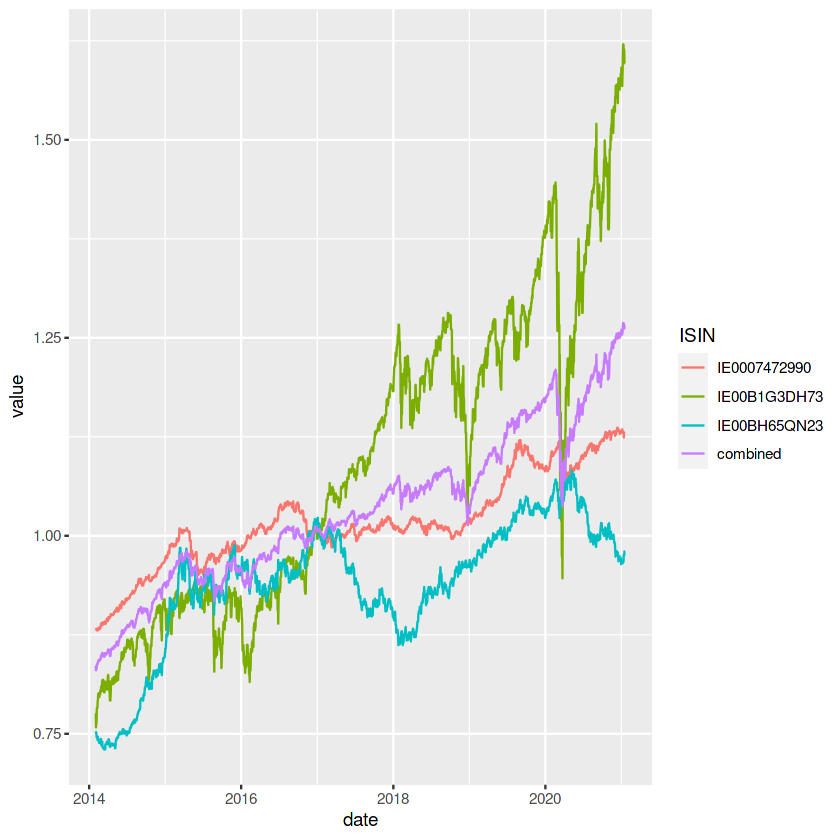

In [28]:
coefs
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))
calc_summary(df_sim,num_days = 365)

In [30]:
df_roi

,LU1437020222,LU1437021204,LU1861136833,LU1525412281,LU1437019307,LU1050469367,LU1050469441,LU1328852659,LU1328852493,LU1328852220,⋯,IE0007471471,IE00BFRTDC76,IE00B04GQT48,IE00B04GQX83,IE00B1S75374,IE00B1S75820,IE00B1S74Q32,IE00B1S74W91,IE00B9M1BB17,IE00B95W7137
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.0000,1.0000,NaN,NaN,1.0000,1.0000,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,0.9925,0.9925,NaN,NaN,1.0067,1.0066,NaN,NaN
2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,0.9925,0.9925,NaN,NaN,1.0067,1.0066,NaN,NaN
2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,0.9925,0.9925,NaN,NaN,1.0067,1.0066,NaN,NaN
2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.0131,1.0131,NaN,NaN,1.0277,1.0277,NaN,NaN
2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.0369,1.0369,NaN,NaN,1.0493,1.0493,NaN,NaN
2009-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.0218,1.0218,NaN,NaN,1.0629,1.0629,NaN,NaN
2009-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.0200,1.0200,NaN,NaN,1.0649,1.0649,NaN,NaN
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,1.0381,1.0381,NaN,NaN,1.0898,1.0898,NaN,NaN


In [50]:

df_subset<-df_roi %>% filter(date>'2016-01-01') %>% select(all_of(historic_portfolio)) %>% na.omit()
coefs <- calc_optim(df_subset, variance_importance=100)
coefs


Iter: 1 fn: -0.3523	 Pars:  0.0000000062212 0.0000000388041 0.0000000064849 0.0000000064863 0.0000000563453 0.0000000563355 0.0000000834097 0.6757603118635 0.0000000062214 0.0000000049050 0.0000000256159 0.0000000256123 0.0000000388048 0.0000000563484 0.0000000049016 0.0000000215659 0.0000000215668 0.0000000944020 0.0000000190091 0.0000000190611 0.0000000592338 0.2015101830690 0.0000000490934 0.0000000491044 0.0000000825830 0.0000000822518 0.0000000247963 0.0000000611036 0.0000000268388 0.0000000268386 0.0000000268410 0.0000000268408 0.0000000209303 0.0000000256132 0.0000000563331 0.0000000256138 0.0000000563426 0.0000000064866 0.0000000064867 0.0000000063460 0.0000000209279 0.0000000063448 0.0000000209284 0.0000000209255 0.0000000063477 0.1227260039788 0.0000000004825 0.0000000059710 0.0000000395972 0.0000000574176 0.0000000063310 0.0000000059724 0.0000000395959 0.0000000063321 0.0000000048256 0.0000000048232 0.0000000004824 0.0000000050511 0.0000000050530 0.0000000058105 0.000000005

IE0007472990 IE00B1G3DH73 IE00BH65QN23 
      0.6758       0.2015       0.1227

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.049535,1.048928,0.001288737,2014-01-31,57
IE0007472990,1.030802,1.030140,0.001384947,2014-01-31,285
IE00B1G3DH73,1.086005,1.082714,0.006988883,2014-01-31,78
IE00BH65QN23,1.050498,1.046146,0.009372431,2014-01-31,386


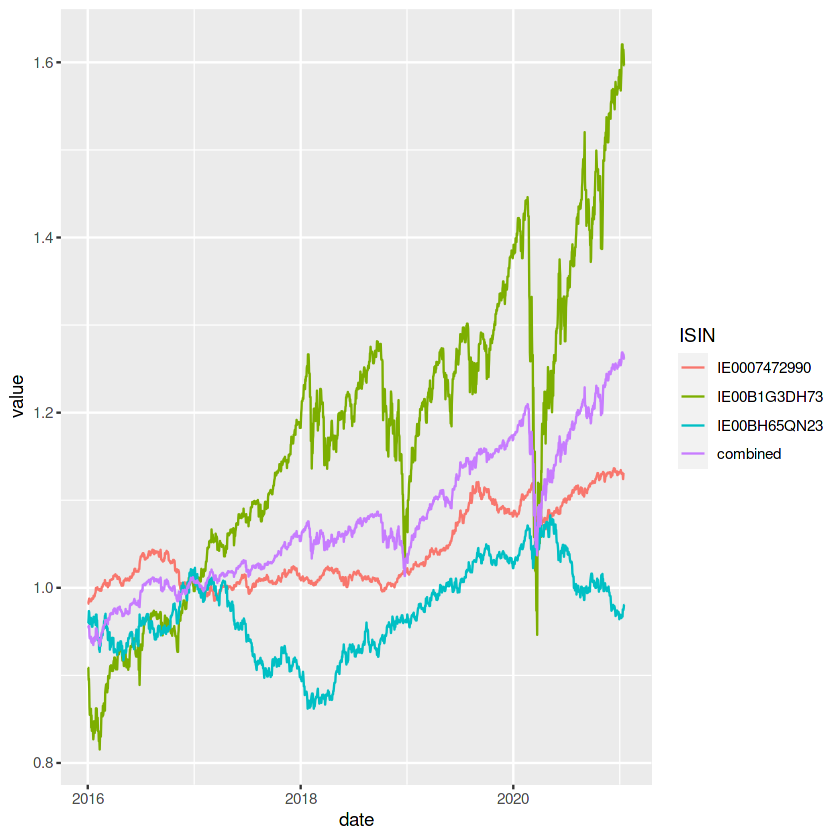

In [51]:
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = '2016-01-01')
calc_summary(df_sim,num_days = 365)


Iter: 1 fn: -0.1780	 Pars:  0.65262 0.19866 0.14872
Iter: 2 fn: -0.1780	 Pars:  0.65262 0.19866 0.14872
solnp--> Completed in 2 iterations


IE0007472990 IE00B1G3DH73 IE00BH65QN23 
      0.6526       0.1987       0.1487

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.049719,1.049106,0.001303446,2014-01-31,55
IE0007472990,1.030802,1.030140,0.001384947,2014-01-31,285
IE00B1G3DH73,1.086005,1.082714,0.006988883,2014-01-31,78
IE00BH65QN23,1.050498,1.046146,0.009372431,2014-01-31,386


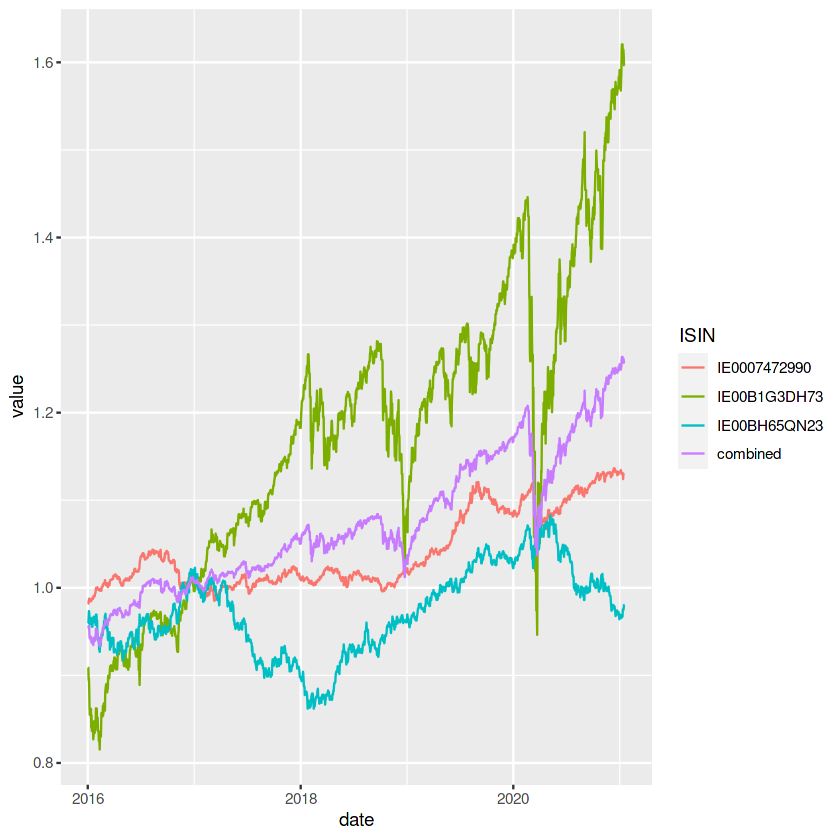

In [53]:
df_subset<-df_roi %>% filter(date>'2016-01-01') %>% select(IE0007472990,IE00B1G3DH73,IE00BH65QN23) %>% na.omit()
coefs <- calc_optim(df_subset, variance_importance=1000)
coefs
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = '2016-01-01')
calc_summary(df_sim,num_days = 365)


Iter: 1 fn: -0.1641	 Pars:  0.71704 0.16872 0.11424
Iter: 2 fn: -0.1641	 Pars:  0.71704 0.16872 0.11424
solnp--> Completed in 2 iterations


IE0007472990 IE00B1G3DH73 IE00BH65QN23 
   0.7170717    0.1687169    0.1142114

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.046967,1.046399,0.001208635,2014-01-31,54
IE0007472990,1.030802,1.030140,0.001384947,2014-01-31,285
IE00B1G3DH73,1.086005,1.082714,0.006988883,2014-01-31,78
IE00BH65QN23,1.050498,1.046146,0.009372431,2014-01-31,386


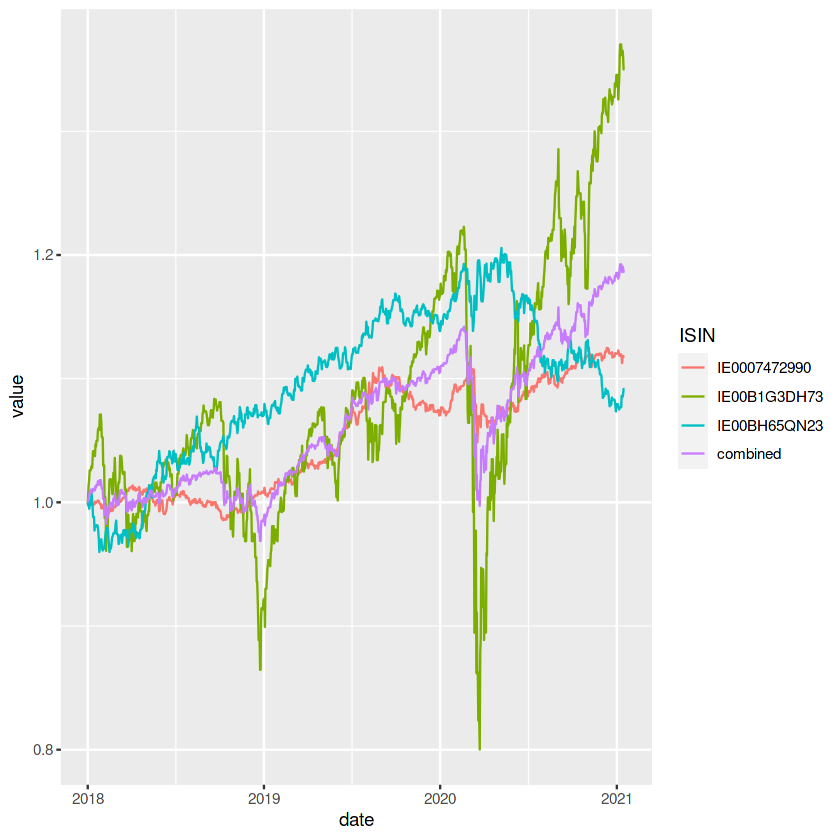

In [55]:
df_subset<-df_roi %>% filter(date>'2018-01-01') %>% select(IE0007472990,IE00B1G3DH73,IE00BH65QN23)  %>% na.omit()
coefs <- calc_optim(df_subset, variance_importance=1000)
coefs
df_sim<-simulate_investment(df_values[,c("date",historic_portfolio)],coefs)
plot_funds(df_sim,start_date = '2018-01-01')
calc_summary(df_sim,num_days = 365)